In [36]:
import numpy as np
import networkx as nx
import sys
sys.path.append("..")
from labelpropagation.label_propagation import LabelPropagation
from collections import Counter
from networkx.algorithms.community import asyn_lpa_communities
import matplotlib.pyplot as plt
import time

In [3]:
def draw_graph(graph, label_map, title):
    colors = [label_map.get(node) for node in graph.nodes()]
    plt.subplot(111)
    nx.draw(graph, with_labels=graph.nodes, node_color=colors)
    plt.title(title)
    plt.show()

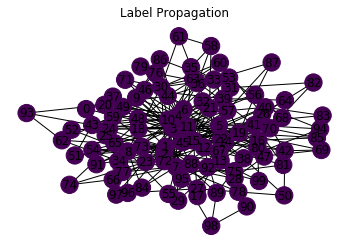

Modularity 3.7675094048705915e-17


In [61]:
G = nx.barabasi_albert_graph(100, 3)
lp = LabelPropagation(network=G)
_, _ = lp.start(label_ties_resolution="retention", convergence_criterium="change", order="asynchronous",
                        weighted=False)
comsLabelPropa = list(asyn_lpa_communities(G))
draw_graph(G, lp.node_labels, "Label Propagation")
print("Modularity", nx.algorithms.community.modularity(G, lp.final_communities))

In [62]:
final = []
for c in comsLabelPropa:
    final.append(list(c))
    print(c)
    print("---")
print("Modularity", nx.algorithms.community.modularity(G, final))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
---
Modularity 3.7675094048705915e-17


0.581387996673584
3


c:\python\python35\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


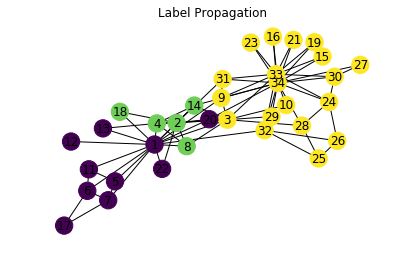

In [11]:
lp = LabelPropagation("../data/ucidata-zachary/out.ucidata-zachary", "U")

start_time = time.time()
graph, labels = lp.start(label_ties_resolution="retention", convergence_criterium="strong-community",
                         order="asynchronous", weighted=False)
print(time.time() - start_time)
print(len(Counter(labels.values())))
draw_graph(graph, labels, "Label Propagation")

4.194738388061523
5


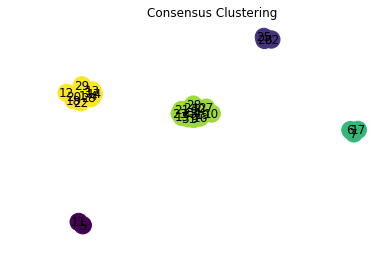

In [12]:
start_time = time.time()
graph, labels = lp.consensus_clustering(label_ties_resolution="retention", convergence_criterium="strong-community",
                                        order="asynchronous", threshold=0.5, number_of_partitions=12, weighted=False)
print(time.time() - start_time)
print(len(Counter(labels.values())))
draw_graph(graph, labels, "Consensus Clustering")

1.2037789821624756
5


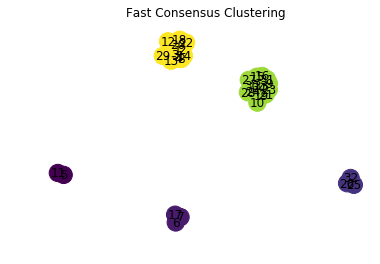

In [13]:
start_time = time.time()
graph, labels = lp.consensus_clustering(label_ties_resolution="retention", convergence_criterium="strong-community",
                                        order="asynchronous", threshold=0.5, number_of_partitions=12, weighted=False, fcc=True, convergence_factor=0.02)
print(time.time() - start_time)
print(len(Counter(labels.values())))
draw_graph(graph, labels, "Fast Consensus Clustering")

BLa
CONNECTIVITY
1
0.02191305160522461
1
3



c:\python\python35\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


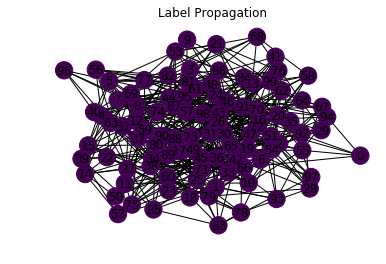

BLa
CONNECTIVITY
1
0.1925063133239746
1
2

BLa
CONNECTIVITY
1
7.81506609916687
1
2



In [ ]:
no_of_nodes = [100, 1000, 10000, 100000, 1000000]
for n in no_of_nodes:
    G = nx.erdos_renyi_graph(n, 0.1)
    print("BLa")
    lp = LabelPropagation(network=G)
    start_time = time.time()
    graph, labels = lp.start(label_ties_resolution="retention", convergence_criterium="strong-community",
                             order="asynchronous", weighted=False)
    print(time.time() - start_time)
    print(len(Counter(labels.values())))
    print(lp.iterations)
    print()
    
    if n == 100:
        draw_graph(graph, labels, "Label Propagation")